In [1]:
# https://kjulous777.tistory.com/48

In [2]:
# !pip install mecab-python3

In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import urllib.request
# from collections import Counter
# from konlpy.tag import Mecab
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
# dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/steam_review.csv"
# total_data = pd.read_csv(dataUrl)
# print('전체 리뷰 개수 :', len(total_data)) # 전체 리뷰 개수 출력

In [5]:
# total_data.to_csv("../dataset/steam_review.csv", index=False)

In [6]:
# total_data.info()

### 라이브러리 선언

In [7]:
# 수/데이터/시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP 라이브러리
from collections import Counter
# from konlpy.tag import Mecab
# import MeCab
# 머신/딥러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### 1. 데이터 불러오기

In [8]:
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/steam_review.csv"
reviewData = pd.read_csv(dataUrl)
print('전체 리뷰 개수 : {}'.format( len(reviewData)) )

전체 리뷰 개수 : 100000


In [9]:
reviewData['reviews'].nunique(), reviewData['label'].nunique()

(99892, 2)

In [10]:
reviewData.reviews.nunique()

99892

In [11]:
reviewData = reviewData.drop_duplicates( ['reviews'] )

In [12]:
print("데이터 shape : {}".format( reviewData.shape )  )

데이터 shape : (99892, 2)


In [13]:
reviewData.isnull().sum()

label      0
reviews    0
dtype: int64

### 2. 데이터 분리

In [14]:
trainData, testData =\
    train_test_split(reviewData, test_size = 0.25, random_state = 42)

print(trainData.shape)
print(testData.shape)

(74919, 2)
(24973, 2)


### 3. 정답지 분포 확인

<Axes: xlabel='label', ylabel='count'>

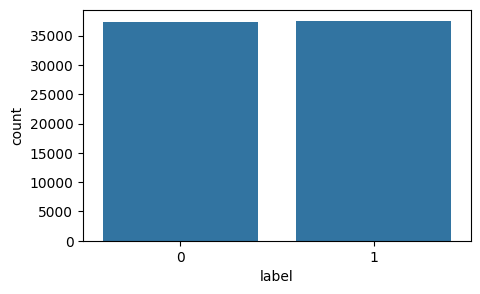

In [15]:
trainData["label"].value_counts()
plt.figure(figsize=(5,3))
sns.countplot(data=trainData, x=trainData.label)

### 4. 데이터 정제하기

In [16]:
import pandas as pd

# 예시 데이터프레임 생성
data = {"reviews": ["Good game!","", "재미있는 게임입니다^^", "Not bad :)", "Excellent!!", "훌륭한 게임입니다!!", "Average..."]}
df = pd.DataFrame(data)

# 한글과 영문을 제외한 모든 문자를 공백으로 대체
df["clean_reviews"] = df["reviews"].replace("[^ㄱ-힣a-zA-Z]", " ", regex=True)
df["clean_reviews"] = df["reviews"].replace("", np.nan)
print(df.isnull().sum())

reviews          0
clean_reviews    1
dtype: int64


In [17]:
def cleanData( indf, targetColumn ):
    targetColumn
    # 한글과 영문을 제외한 모든 문자를 공백으로 대체 # Null 값 제거
    indf[targetColumn] = indf[targetColumn].replace("[^ㄱ-힣a-zA-Z]", " ", regex=True)
    indf[targetColumn] = indf[targetColumn].replace("", np.nan)
    indf.dropna(how='any') 
    return indf

trainData = cleanData(trainData, targetColumn="reviews")
testData = cleanData(testData, targetColumn="reviews")

In [18]:
# !pip install kiwipiepy

### 5. 토큰화

In [19]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

# 한국어 토큰화 함수 정의
def tokenize_text_kor(text):
    results = []
    tokens = kiwi.analyze(text)
    for token, pos, _, _ in tokens[0][0]:
        if ( len(token) != 1 )  :
        # if ( len(token) != 1 ) &  ( pos.startswith('N') ) | ( pos.startswith('SL') ) :
            results.append(token)
    resultString = ' '.join(results)
    return resultString

# 'review' 열에 대해 토큰화 작업을 수행하여 'reviews' 열에 저장
trainData['tokenized'] = trainData['reviews'].apply(tokenize_text_kor)

In [20]:
testData['tokenized'] = testData['reviews'].apply(tokenize_text_kor)

In [21]:
trainData

,label,reviews,tokenized
17152,1,게임 클리어 할 때까지 계속 새롭고 질리지 않습니다 정말 잘 만든 퍼즐 게임입니다 ...,게임 클리어 까지 계속 새롭 질리 습니다 정말 만드 퍼즐 게임 ᆸ니다 추천 ᆸ니다
59872,0,편 나름 재밌게 했으면 그걸로 멈추는게 좋았네,나름 재밌 으면 그거 ᆯ로 멈추
40613,0,할거 드럽게 없음,할거 드럽
80196,0,GFWL ㅈ까라 이건 그거 하나만으로도 살 가치가 없는 겜 내가 저거 때문에 이...,GFWL 어라 이거 그거 하나 으로 가치 저거 때문 어서 지금 평가 작성 까지 제대...
35283,0,돈 아깝다,아깝
...,...,...,...
6265,1,이쯤되면 생존자가 살인마,이쯤 생존자 살인마
54920,1,시간때우기 매우좋은 게임 특히 군사전략게임을 좋아한다면 한번 해보는것을 추천한다,시간 때우 매우 게임 특히 군사 전략 게임 좋아하 ᆫ다면 추천 ᆫ다
76885,1,스팀에 출시돼고 나서야 알게되었지만 지금이라도 알게돼 다행이다 나는 비시즈를 좋...,스팀 출시 나서 지만 지금 라도 다행 비시즈 좋아하 게임 구입 비시즈 비행기 만들 ...
860,0,점프도 어렵고 금방 끝남,점프 어렵 금방


In [22]:
# from konlpy.tag import Okt
# okt = Okt()

# # 한국어 토큰화 함수 정의
# def tokenize_text_kor(text):
#     tokens = okt.morphs(text)  # Okt 형태소 분석기를 사용하여 텍스트를 형태소로 분석합니다.
#     resultString = ','.join(tokens)
#     return resultString

# # 'review' 열에 대해 토큰화 작업을 수행하여 'reviews' 열에 저장
# trainData['tokenized'] = trainData['reviews'].apply(tokenize_text_kor)#, multiprocessing=True)

In [23]:
# from konlpy.tag import Kkma

# # 꼬꼬마 형태소 분석기 불러오기
# kkma = Kkma()

# # 한국어 토큰화 함수 정의
# def tokenize_text_kor(text):
#     tokens = kkma.morphs(text)  # 꼬꼬마 형태소 분석기를 사용하여 텍스트를 형태소로 분석합니다.
    # resultString = ','.join(tokens)
    # return resultString

# # 'review' 열에 대해 토큰화 작업을 수행하여 'reviews' 열에 저장
# trainData['tokenized'] = trainData['reviews'].apply(tokenize_text_kor)

# # 결과 출력
# print(trainData['tokenized'])

In [24]:
# from konlpy.tag import Okt
# okt = Okt()

# text = "자연어 처리 공부는 재미있다."

# morphs = okt.morphs(text)
# print(morphs)

### 6. 불용어 제거

In [25]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

def remove_stopwords(text):
    # 텍스트를 단어로 분리합니다.
    tokens = text.split()
    
    # 불용어를 제거합니다.
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords:
            filtered_tokens.append(token)
    
    # 단어를 다시 문자열로 합쳐줍니다.
    return ' '.join(filtered_tokens)
# 'tokenized' 컬럼의 각 텍스트에 대해 불용어를 제거한 결과를 새로운 컬럼에 저장합니다.
trainData['tokenized'] = trainData['tokenized'].apply(remove_stopwords)

In [26]:
testData['tokenized'] = testData['tokenized'].apply(remove_stopwords)

### 7. 단어와 길이 분포 확인하기

In [27]:
negativeWords = trainData.loc[trainData.label == 0]['tokenized'].values
positiveWords =trainData.loc[trainData.label == 1]['tokenized'].values

negativeWordCount = Counter(negativeWords)
print(negativeWordCount.most_common(20))

positiveWordCount = Counter(positiveWords)
print(positiveWordCount.most_common(20))

[('', 558), ('실행', 42), ('이거', 39), ('한글', 34), ('시발', 30), ('재미없', 29), ('환불', 29), ('사람', 28), ('아깝', 27), ('쓰레기', 26), ('재미', 24), ('병신', 23), ('이것', 21), ('조작', 21), ('노잼', 18), ('별로', 16), ('어요', 15), ('너무', 15), ('한글 패치', 15), ('그냥', 14)]
[('', 487), ('재밌', 69), ('ᆸ니다', 22), ('재미', 21), ('사람', 19), ('재미있', 19), ('어렵', 18), ('이것', 18), ('어요', 18), ('ᆫ다', 17), ('시간', 16), ('이거', 16), ('갓겜', 15), ('필요', 15), ('명작', 14), ('추억', 14), ('습니다', 13), ('재밌 어요', 12), ('그냥', 12), ('한글', 12)]


In [28]:
text_len = trainData[trainData['label']==1]['tokenized'].map(lambda x: len(x))

In [29]:
def calculate_token_length(data):
    # 긍정 리뷰의 토큰 수를 저장할 리스트를 생성합니다.
    textLen = len(data)
    return textLen

긍정 리뷰의 평균 길이 : 30.688250805742747
부정 리뷰의 평균 길이 : 30.513056506849313


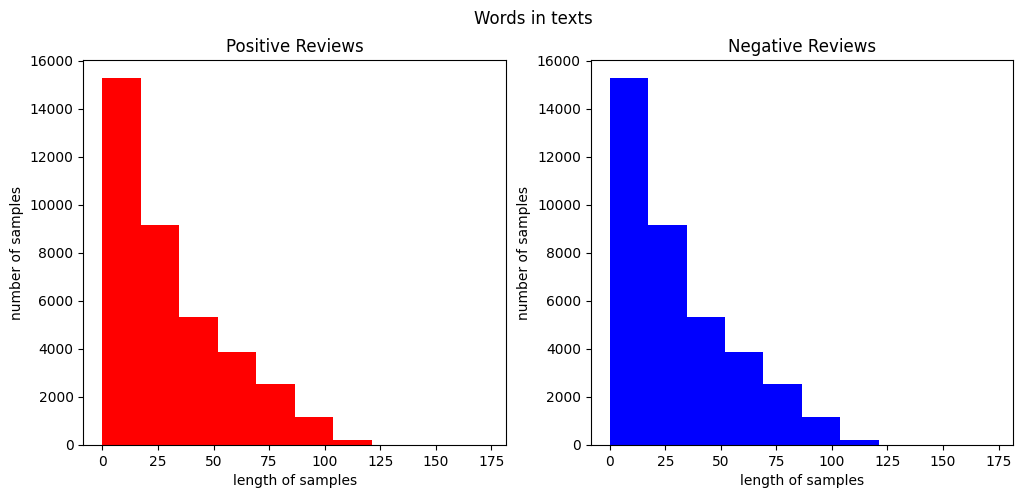

In [30]:
positiveLen = trainData.loc[trainData['label']==1]['tokenized'].apply(calculate_token_length)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(positiveLen))

negativeLen = trainData.loc[trainData['label']==0]['tokenized'].apply(calculate_token_length)
ax2 = fig.add_subplot(1,2,2)
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(negativeLen))

### 8. 정수 인코딩

In [31]:
# 시작하기전 알아둘 포인트
from tensorflow.keras.preprocessing.text import Tokenizer

# 텍스트 데이터
texts = [
    'I love deep learning',
    'Natural language processing is fun',
    'Machine learning is cool'
]

# Tokenizer 객체 생성
tokenizer = Tokenizer()

# Tokenizer를 사용하여 텍스트를 시퀀스로 변환
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print("Original Texts:")
for text in texts:
    print(text)

print("\nSequences:")
for sequence in sequences:
    print(sequence)
#tokenizer.word_index

Original Texts:
I love deep learning
Natural language processing is fun
Machine learning is cool

Sequences:
[3, 4, 5, 1]
[6, 7, 8, 2, 9]
[10, 1, 2, 11]


In [32]:
X_train = trainData['tokenized'].values
y_train = trainData['label'].values
X_test= testData['tokenized'].values
y_test = testData['label'].values

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [34]:
tokenizer.word_index

{'어서': 1,
 'ᆸ니다': 2,
 '는데': 3,
 '습니다': 4,
 '지만': 5,
 '으로': 6,
 '재밌': 7,
 '너무': 8,
 '네요': 9,
 '아니': 10,
 '플레이': 11,
 '에서': 12,
 'ᆫ다': 13,
 '어요': 14,
 '시간': 15,
 '어도': 16,
 '이거': 17,
 '재미': 18,
 '어야': 19,
 'ᆫ데': 20,
 '추천': 21,
 '사람': 22,
 '나오': 23,
 '보다': 24,
 '스토리': 25,
 '생각': 26,
 '모르': 27,
 '그냥': 28,
 '재미있': 29,
 '으면': 30,
 '세요': 31,
 '한글': 32,
 '진짜': 33,
 '어렵': 34,
 '정말': 35,
 'ᆫ지': 36,
 '그래픽': 37,
 '정도': 38,
 '버그': 39,
 '까지': 40,
 '그렇': 41,
 '면서': 42,
 '만들': 43,
 'ᆫ가': 44,
 '다가': 45,
 '조작': 46,
 '라고': 47,
 '친구': 48,
 '멀티': 49,
 '환불': 50,
 '즐기': 51,
 '은데': 52,
 '느낌': 53,
 '처음': 54,
 '만드': 55,
 '어라': 56,
 '퍼즐': 57,
 '버리': 58,
 '구매': 59,
 '많이': 60,
 '이것': 61,
 '좋아하': 62,
 '다시': 63,
 '난이도': 64,
 '엔딩': 65,
 '실행': 66,
 '패치': 67,
 '보이': 68,
 '다고': 69,
 '때문': 70,
 '이런': 71,
 '시작': 72,
 '느끼': 73,
 '하나': 74,
 '그리고': 75,
 '이상': 76,
 '서버': 77,
 '괜찮': 78,
 '라는': 79,
 '근데': 80,
 '계속': 81,
 '다면': 82,
 '는지': 83,
 '도전': 84,
 '아쉽': 85,
 '무료': 86,
 '다른': 87,
 '별로': 88,
 '부터': 89,
 '진행': 90,
 '에게': 91,

In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 {}번 이하인 희귀 단어의 수: {}'.format(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 35187
등장 빈도가 1번 이하인 희귀 단어의 수: 18944
단어 집합에서 희귀 단어의 비율: 53.83806519453207
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.642455318596921


In [36]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[:3])

print(X_test[:3])

단어 집합의 크기 : 16245
[[199, 41, 82, 369, 150, 5, 36, 56, 58, 3, 22, 3], [180, 8, 31, 268, 421, 325], [3475, 912]]
[[526, 907, 262, 3, 51, 20, 4, 1797, 298], [455, 259, 482, 446, 75, 1180, 48, 39, 366, 368, 149, 100, 2850, 41, 271, 4746, 4198], [583, 30, 10, 237]]


### 9. 패딩

리뷰의 최대 길이 : 58
리뷰의 평균 길이 : 9.569121317689772


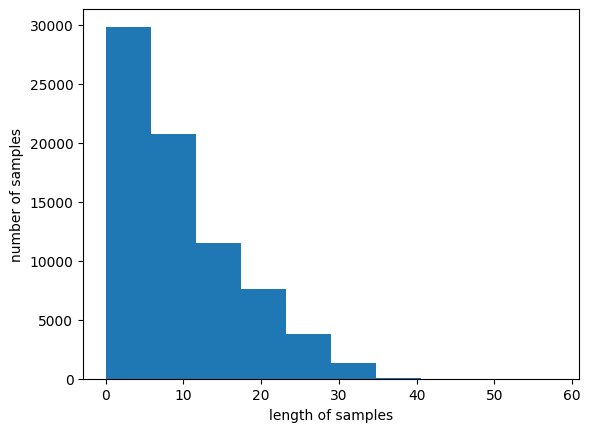

In [49]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

trainLen = []

for review in X_train:
    trainLen.append( len(review) )

plt.hist(trainLen)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [58]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 {} 이하인 샘플의 비율: {}'.format(max_len, (count / len(nested_list))*100))

max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 100.0


In [60]:
X_train[0]

[199, 41, 82, 369, 150, 5, 36, 56, 58, 3, 22, 3]

In [61]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [63]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 199,  41,  82, 369,
       150,   5,  36,  56,  58,   3,  22,   3])

### 10. 모델 정의 및 학습

In [64]:
vocab_size

16245

In [66]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
## 전체단어수 - 등장빈도 2개 이하 단어수 + 2 (oov토큰)
## embedding_dim은 Embedding 층에서 각 단어를 나타내는 벡터의 차원 크기를 결정하는 매개변수
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)


Epoch 1/15
234/235 [============================>.] - ETA: 0s - loss: 0.5783 - acc: 0.6969
Epoch 1: val_acc improved from -inf to 0.74686, saving model to best_model.h5
235/235 [==============================] - 20s 70ms/step - loss: 0.5783 - acc: 0.6970 - val_loss: 0.5099 - val_acc: 0.7469
Epoch 2/15
234/235 [============================>.] - ETA: 0s - loss: 0.4669 - acc: 0.7799
Epoch 2: val_acc improved from 0.74686 to 0.74786, saving model to best_model.h5
235/235 [==============================] - 16s 67ms/step - loss: 0.4669 - acc: 0.7800 - val_loss: 0.5042 - val_acc: 0.7479
Epoch 3/15
234/235 [============================>.] - ETA: 0s - loss: 0.4243 - acc: 0.8050
Epoch 3: val_acc did not improve from 0.74786
235/235 [==============================] - 16s 67ms/step - loss: 0.4243 - acc: 0.8050 - val_loss: 0.5208 - val_acc: 0.7444
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 0.3880 - acc: 0.8229
Epoch 4: val_acc did not improve from 0.74786
235/235 [=======

### 11. 예측

In [81]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = tokenize_text_kor(new_sentence) # 토큰화
  new_sentence = remove_stopwords(new_sentence) # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)[0][0]) # 예측
  if(score > 0.5):
    print("{} 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{} 확률로 부정 리뷰입니다.".format((1 - score) * 100))


In [82]:
new_sentence="이 게임 더럽게 재미없네"
sentiment_predict(new_sentence)

1/1 [==============================] - 0s 24ms/step
98.1838958337903 확률로 부정 리뷰입니다.


In [83]:
new_sentence2="이 게임 너무 재미있어요"
sentiment_predict(new_sentence2)

1/1 [==============================] - 0s 30ms/step
86.20617985725403 확률로 긍정 리뷰입니다.


In [209]:
new_sentence2="이 게임 너무 재미있어요"

### 기타

In [141]:
from collections import Counter

my_list = ['a', 'b', 'c', 'a', 'b', 'a', 'a', 'c', 'd']

# 리스트의 각 요소들의 빈도를 계산합니다.
my_counter = Counter(my_list)